# Table of Contents

#### *1. Business Context*
#### *2. Data Exploration and Preprocessing*
#### *3. Explanatory Data Analysis and Model Building*
#### *4. Final Discussion*
#### *5. Links*

# 1. Business Context

##### Business Context:

The client company is a car dealership, which deals with a diverse inventory of vehicles spanning multiple makes and models. The dealership maintains records on different vehicle characteristics.

The company wants me to analyze the inventory data in order to uncover insights into customer tendencies, customer segregation and price trends. They want to understand which car makes are in high demand, and how the vehicle characteristics are influencing their price, and how inventory can be optimised to address budget-conscious,mid-range and luxury buyers.

Apart from this, they also need me to create a price predictive model that can predict the price of a vehicle based on the characteristics of the vehicle which will help in data-driven pricing and inventory management. This analysis will help the dealership improve sales efficiency, align marketing strategies with customer demand and maximise profitability in all market segments.

When I am importing pandas as pd, I am importing a library called pandas as an alias called pd, the same goes for numpy and seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

When I am importing matplotlib.pylot, I am importing matplotlib which is the library, pyplot which is the module in the library and plt is the alias for pyplot.

In [2]:
import matplotlib.pyplot as plt

When I am importing sklearn (library), linear_model which is the module and LinearRegression which is the class, and this is the same for the others

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Reading the csv file using its path and storing it in a dataframe called df and using head() to display the first 5 records

In [4]:
df = pd.read_csv(r'C:\Users\ANURON MITRA\Downloads\archive (11)\data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# 2. Data Exploration and Preprocessing

In this step, I am filling the missing values. For categorical columns, I am filling it with mode and for numerical columns I am filling it with median.I am also trying to find any outliers in the data and remove it

Checking the data types in the dataset

In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Checking the number of rows and columns in the dataset using shape which is an attribute. 11914 being the number of rows and 16 being the number of columns

In [6]:
df.shape

(11914, 16)

Renaming MSRP column to Price using the .rename() function, for my ease of use, and inplace = True will store the changes I make in the dataframe

In [7]:
df.rename(columns = {'MSRP':'Price'}, inplace = True)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Finding all the missing values in the dataset, by using a for loop to search for each column in the data and then using .isnull() function to check the null values for each column and .sum() to calculate the total number of null values in each column. Using this method, I dont need to manually repeat the method for each column. We can see that the data has missing values in some columns. There are 3 missing values in Engine Fuel Type, 69 missing values in Engine HP, 30 in Engine Cylinders, 6 in number of doors and 3742 in market category.

In [8]:
for col in df:
    print(f'{col} : ', df[col].isnull().sum())

Make :  0
Model :  0
Year :  0
Engine Fuel Type :  3
Engine HP :  69
Engine Cylinders :  30
Transmission Type :  0
Driven_Wheels :  0
Number of Doors :  6
Market Category :  3742
Vehicle Size :  0
Vehicle Style :  0
highway MPG :  0
city mpg :  0
Popularity :  0
Price :  0


I am selecting the data types which are either categorical or object from the dataset and only displaying the first three rows in the dataframe. The categorical features in the dataframe are Make, Model, Engine Fuel Type, Transmission Type, Driven Wheels, Market Category, Vehicle Size and Vehicle Style.

In [9]:
categorical_variables = df.select_dtypes(include = ['category','object'])
categorical_variables.head(3)

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe


I am selecting the data types which are numerical from the dataset and only displaying the first three rows in the dataframe. The numerical features in the dataframe are Year, Engine HP, Engine Cylinders, Number of Doors, highway MPG, city MPG, Popularity and Price.

In [10]:
numerical_variables = df.select_dtypes(include = ['number'])
numerical_variables.head(3)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Price
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350


Using a for loop to select each categorical column from categorical_variables and filling the missing values in the categorical columns in the main dataframe using mode. I am using [0] to select the first value, as mode may return multiple equally frequently occuring categories and it would give me an error. This way I fill the missing values with the most commonly occurring categorical values for each column.

In [11]:
for col in categorical_variables.columns:
    df[col].fillna(df[col].mode()[0], inplace = True)
    print(f'{col} : ', df[col].isnull().sum())

Make :  0
Model :  0
Engine Fuel Type :  0
Transmission Type :  0
Driven_Wheels :  0
Market Category :  0
Vehicle Size :  0
Vehicle Style :  0


C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\1998797048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)


Using a for loop to select each column from numerical_variables and filling the missing values in the numerical columns using median.

In [12]:
for col in numerical_variables.columns:
    df[col].fillna(df[col].median(), inplace = True)
    print(f'{col} : ', df[col].isnull().sum())

Year :  0
Engine HP :  0
Engine Cylinders :  0
Number of Doors :  0
highway MPG :  0
city mpg :  0
Popularity :  0
Price :  0


C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\4147500065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)


Using describe() function to check the count, mean, standard deviation, min, max of the numerical variables in the dataset.

In [13]:
numerical_variables.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Price
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [14]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Final Check to see if there are any null values left in the dataframe

In [15]:
for col in df:
    print(f'{col} : ', df[col].isnull().sum())

Make :  0
Model :  0
Year :  0
Engine Fuel Type :  0
Engine HP :  0
Engine Cylinders :  0
Transmission Type :  0
Driven_Wheels :  0
Number of Doors :  0
Market Category :  0
Vehicle Size :  0
Vehicle Style :  0
highway MPG :  0
city mpg :  0
Popularity :  0
Price :  0


Using a for loop, I am selecting the numerical variables from numerical_variables,and then using plt.boxplot() to plot the boxplots for all the numerical columns in the dataset to visualise the outliers.

C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\2630207578.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels = [col])


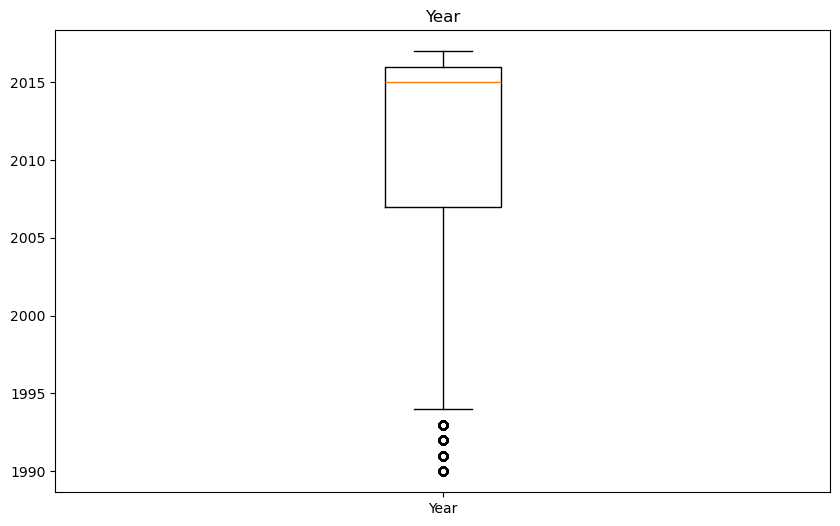

C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\2630207578.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels = [col])


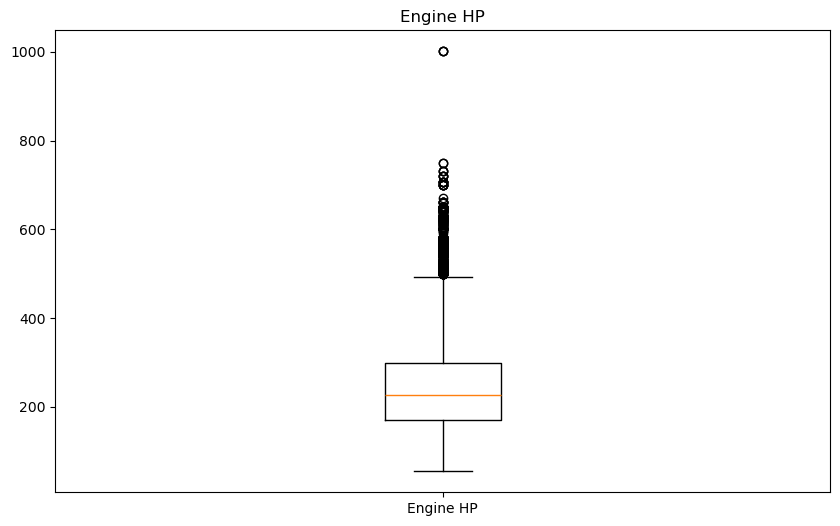

C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\2630207578.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels = [col])


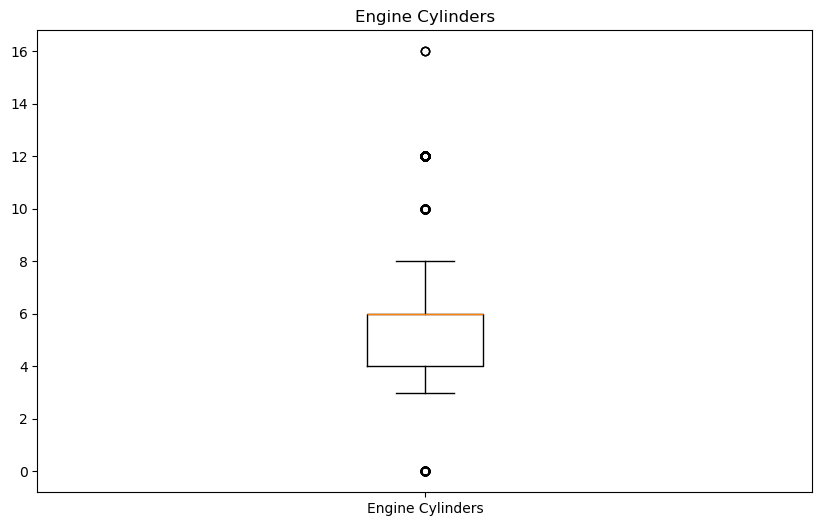

C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\2630207578.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels = [col])


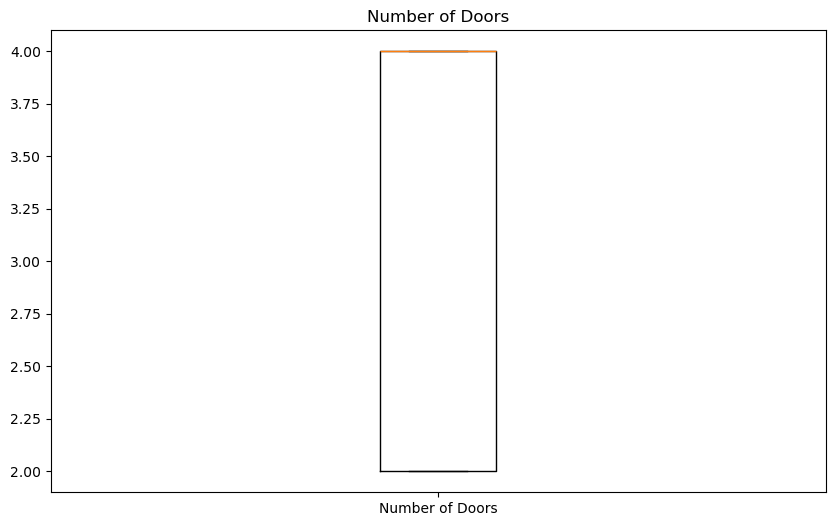

C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\2630207578.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels = [col])


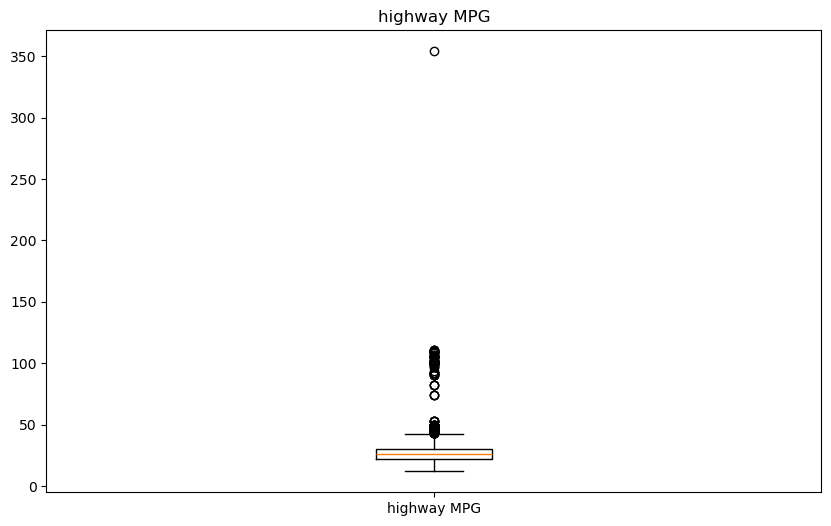

C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\2630207578.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels = [col])


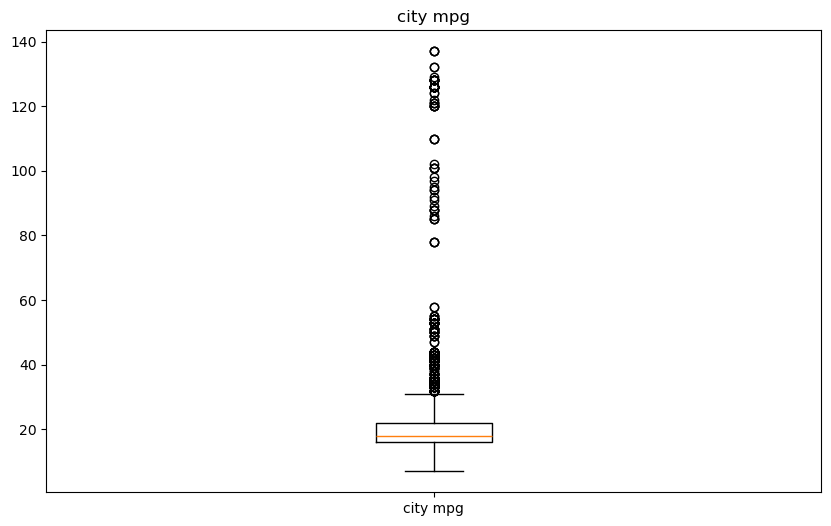

C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\2630207578.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels = [col])


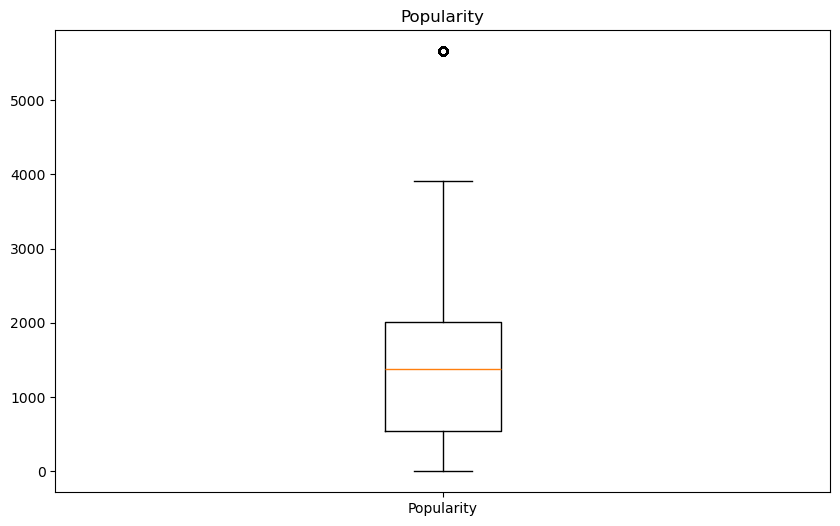

C:\Users\ANURON MITRA\AppData\Local\Temp\ipykernel_28232\2630207578.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels = [col])


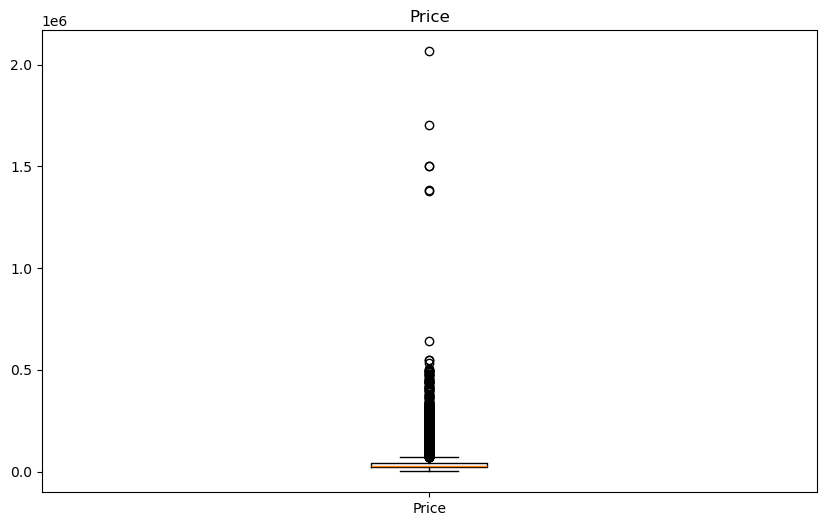

In [16]:
for col in numerical_variables:
    plt.figure(figsize = (10,6))
    plt.boxplot(df[col], labels = [col])
    plt.title(col)
    plt.show()

In [ ]:
df.shape

Checking outliers for all the numerical columns in the dataframe(df) by:

1) Calculating the Quartile 1 and Quartile 3 using the quantile() function and then finding the interquartile range
2) Finding the upper bound and lower bound
3) In outliers I am storing any value which is either less than the lower bound or greater than the upper bound
4) I am then printing the total number of outliers for each column using the len() function to count all the outliers

We can see there are a lot of outliers in the different columns in the dataset. The column Year has 661 outliers, Engine HP has 509 outliers, Engine Cylinders has 357 outliers, highway MPG has 192 outliers,city MPG has 316 outliers, Popularity has 881 outliers and Price has 996 outliers. 


In [17]:
for col in numerical_variables.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    outliers = df[(df[col]<lower_bound) | (df[col]>upper_bound)]
    print(f'Column Name: {col} Outliers: {len(outliers)}')

Column Name: Year Outliers: 661
Column Name: Engine HP Outliers: 509
Column Name: Engine Cylinders Outliers: 357
Column Name: Number of Doors Outliers: 0
Column Name: highway MPG Outliers: 192
Column Name: city mpg Outliers: 316
Column Name: Popularity Outliers: 881
Column Name: Price Outliers: 996


Only selecting data which greater than or equal to the lower bound and lower than or equal to the upper bound, and storing it back in the original dataframe df, so that there wont be any outliers in the dataframe (df), which will help in getting more accurate trends and also improves the linear regression model.

In [18]:
for col in numerical_variables.columns:
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
for col in numerical_variables.columns:
    outliers = df[(df[col]<lower_bound) | (df[col]>upper_bound)]
    print(f'Column Name: {col} Outliers: {len(outliers)}')

Column Name: Year Outliers: 0
Column Name: Engine HP Outliers: 0
Column Name: Engine Cylinders Outliers: 0
Column Name: Number of Doors Outliers: 0
Column Name: highway MPG Outliers: 0
Column Name: city mpg Outliers: 0
Column Name: Popularity Outliers: 0
Column Name: Price Outliers: 0


I am creating a blank list called num_cols and then I am using a for loop to iterate over all the column names in numerical_variables dataframe and then appending each column name to the list.

I am using the .corr() function to find the correlation between Price and the other numerical columns in the dataframe which gives an idea on how the other features influence price.

The most highly correlated features with price are engine horsepower, year, engine cylinder and number of doors. These features can be really useful while predicting the price of a car based on its characterstics and also while performing EDA.

In [20]:
num_cols = []
for i in numerical_variables.columns:
    num_cols.append(i)

num_cols

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'Price']

In [21]:
(df[num_cols].corr()['Price']).sort_values(ascending = False)

Price               1.000000
Engine HP           0.732025
Year                0.696262
Engine Cylinders    0.285559
Number of Doors     0.211695
Popularity          0.034824
highway MPG        -0.007879
city mpg           -0.035043
Name: Price, dtype: float64

I am filtering out the rows using !=, so that any rows which have the transmission type called unknown will be filtered out and I am storing the filtered dataframe back in the original dataframe df.

In [22]:
df['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [23]:
df = df[df['Transmission Type'] != 'UNKNOWN']

The shape shows that the number of rows have decreased to 10899 after filtering out the outliers and the columns which had transmission type as unknown.

In [24]:
df.shape

(10899, 16)

##### Data Exploration:

1) The data has mainly 3 data types (float, object and int).
2) The data has 11914 rows and 16 columns.
3) The data has missing values in some columns. There are 3 missing values in Engine Fuel Type, 69 missing values in Engine HP, 30 in Engine Cylinders, 6 in number of doors and 3742 in market category.
4) The categorical features in the dataframe are Make, Model, Engine Fuel Type, Transmission Type, Driven Wheels, Market Category, Vehicle Size and Vehicle Style and the numerical features are Year, Engine HP, Engine Cylinders, Number of Doors, highway MPG, city MPG, Popularity and Price.
5) The most highly correlated features with price are engine horsepower, year, engine cylinder and number of doors. These features can be really useful while predicting the price of a car based on its characteristics and also for exploratory data analysis.
6)  There are a lot of outliers in the different columns in the dataset. The column Year has 661 outliers, Engine HP has 509 outliers, Engine Cylinders has 357 outliers, highway MPG has 192 outliers,city MPG has 316 outliers, Popularity has 881 outliers and Price has 996 outliers.
7)  There are some rows with transmission type as unkown.

##### Data Preprocessing:

1) The numerical missing values are filled with the median of the numerical columns and the categorical missing values are filled with mode of the categorical columns.
2) The outliers have been identified using the IQR method and have been filtered out of the dataset, by only selecting the data which was less than the upper bound and greater than the lower bound.
3) The records which had Transmission Type as unknown have been filtered out.

# 3. Explanatory Data Analysis and Model Building

### Question 1: Which car makes represent the premium section of the market and what does this reveal about their market positioning?

Using this code, I can check which car makes have the highest average price, which will help me identify the premium cars and also the market category they belong to.

I am grouping the make of the car with it's average price using the groupby() function and finding the average price for each make using .mean(). Then I am resetting the index using .reset_index(), so that the Make column is not in index position, and sorting the values by Price in descending order to see the most expensive Car Makes by their average price using the .sort_values() function and by setting ascending is False. I am displaying the top 10 car makes by average price using head(10).

In [25]:
average_price_per_make = df.groupby('Make')['Price'].mean()
avg_price_per_make = average_price_per_make.reset_index().sort_values(by = 'Price', ascending = False)
appm = avg_price_per_make
appm.head(10)

,Make,Price
22,Maserati,71000.000000
35,Tesla,69360.000000
1,Alfa Romeo,61600.000000
21,Lotus,60245.000000
5,Cadillac,48528.058065
3,BMW,46689.179916
12,Genesis,46616.666667
18,Land Rover,45797.712766
16,Infiniti,42253.009119
20,Lincoln,42024.481250


I am grouping the make of the car with the market category, and then I am using the .apply() function to help me run a custom operation via the lambda function, where I use mode to find the most frequently occuring market category for each make, but I am using .iloc[0] to select the category in the first index position, incase there are multiple equally frequently occuring categories. Then I am using .reset_index() to turn the Make from the index position to a regular column and turn it into a dataframe. Then I am sorting the values by the market category using the .sort_values() function by using the market category.

In [26]:
mcpm = df.groupby('Make')['Market Category'].apply(lambda x:x.mode().iloc[0]).reset_index().sort_values(by = 'Market Category')
mcpm.head(10)

,Make,Market Category
26,Nissan,Crossover
28,Plymouth,Crossover
37,Volkswagen,Crossover
17,Kia,Crossover
29,Pontiac,Crossover
15,Hyundai,Crossover
14,Honda,Crossover
25,Mitsubishi,Crossover
23,Mazda,Crossover
11,GMC,Crossover


I am then merging the 2 columns using .merge() function on the common column called Make.

In [27]:
fin = appm.merge(mcpm, on = 'Make')
fin = fin.head(10)
fin

,Make,Price,Market Category
0,Maserati,71000.000000,"Exotic,Luxury,High-Performance"
1,Tesla,69360.000000,"Exotic,Performance"
2,Alfa Romeo,61600.000000,"Luxury,High-Performance"
3,Lotus,60245.000000,"Exotic,High-Performance"
4,Cadillac,48528.058065,"Luxury,Performance"
5,BMW,46689.179916,"Luxury,Performance"
6,Genesis,46616.666667,"Luxury,Performance"
7,Land Rover,45797.712766,"Crossover,Luxury"
8,Infiniti,42253.009119,"Luxury,Performance"
9,Lincoln,42024.481250,Luxury


I am plotting a bar chart using sns.barplot() with x axis as make of the car and y as the average price per make, I am setting the hue as the market categories to display the market categories for each make as different colors. I had set the figure size as (12,8), I have set the xticks = 90, to rotate the labels in the x axis at a 90 degree angle so that the names do not overlap with each other.

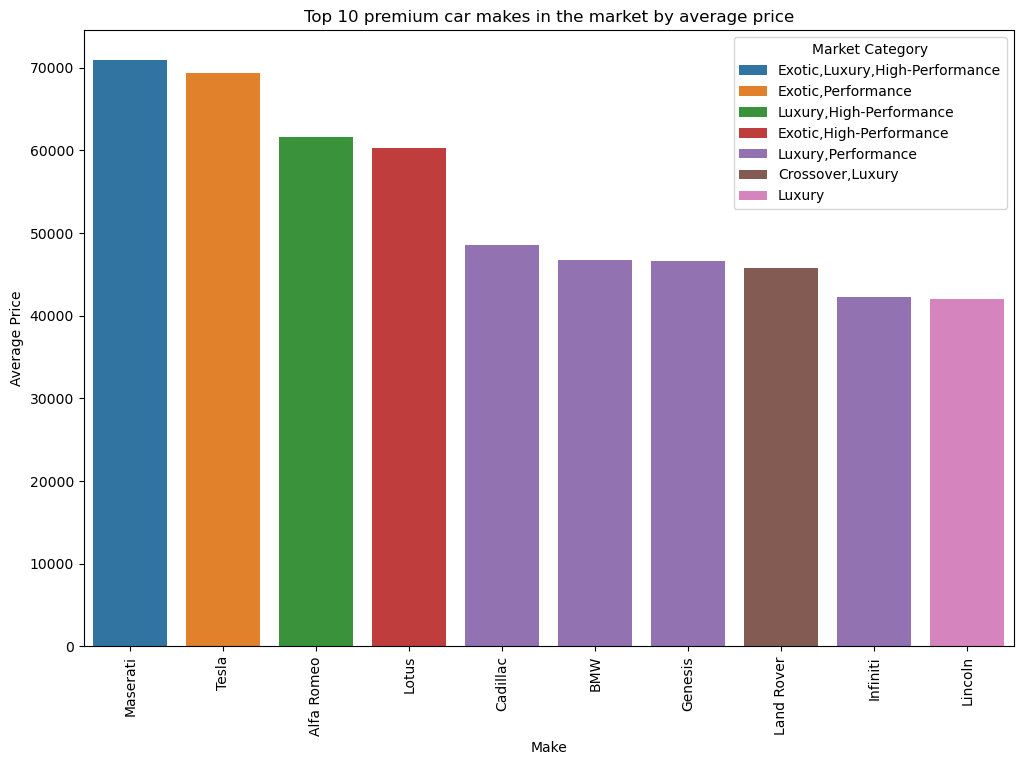

In [28]:
plt.figure(figsize = (12,8))
sns.barplot(data = fin, x = 'Make', y = 'Price', hue = 'Market Category')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.title('Top 10 premium car makes in the market by average price')
plt.show()

The analysis shows car makes like Masarati, Tesla, Alfa Romeo, Lotus, Cadillac, BMW, Genesis, Land Rover, Infiniti and Lincoln belong to the premium segment of the listings. All these car makes have a higher average price than the other car makes. So these car makes represents the premium section of the market and falls into market categories such as exotic, high performace, luxury, performance and crossover. This can help with inventory management, targeted marketing and pricing strategies especially targeted towards premium vehicle buyers.

### Question 2: How does engine fuel type influence the average price of vehicles and what insights can it provide for pricing strategy and marketing?

This code helps me to identify the average prices and market categories for cars with different engine fuel types.

I am creating a pivot table using the .pivot_table() function, with the index being the engine fuel type and the values being the Price, and the aggregation function I used was mean to see the average pricing per engine fuel type. Then I sorted the values as per the average price in descending order and then I rounded it to 2 decimal places using .round(2).

In [29]:
piv = df.pivot_table(index = 'Engine Fuel Type', values = 'Price', aggfunc = 'mean')
piv.reset_index(inplace = True)
piv = piv.sort_values(by = 'Price', ascending = False)
piv.round(2)

,Engine Fuel Type,Price
3,flex-fuel (premium unleaded required/E85),65461.25
2,flex-fuel (premium unleaded recommended/E85),48641.92
8,premium unleaded (required),44891.64
0,diesel,39558.35
5,flex-fuel (unleaded/natural gas),39194.17
7,premium unleaded (recommended),38602.98
1,electric,37291.32
4,flex-fuel (unleaded/E85),34901.90
6,natural gas,28065.00
9,regular unleaded,22817.49


I am grouping the engine fuel type and market category using .groupby() and finding the most common market category for each engine fuel type. Then I am merging both the dataframes using the common column Engine Fuel type.

In [30]:
mc = df.groupby('Engine Fuel Type')['Market Category'].apply(lambda x: x.mode()[0]).reset_index().sort_values(by = 'Market Category')
piv1 = piv.merge(mc, on = 'Engine Fuel Type')
piv1

,Engine Fuel Type,Price,Market Category
0,flex-fuel (premium unleaded required/E85),65461.250000,"Flex Fuel,Luxury,Performance"
1,flex-fuel (premium unleaded recommended/E85),48641.923077,"Flex Fuel,Luxury"
2,premium unleaded (required),44891.637198,"Luxury,Performance"
3,diesel,39558.346667,Diesel
4,flex-fuel (unleaded/natural gas),39194.166667,"Flex Fuel,Performance"
5,premium unleaded (recommended),38602.977397,Luxury
6,electric,37291.320755,Hatchback
7,flex-fuel (unleaded/E85),34901.902635,Flex Fuel
8,natural gas,28065.000000,Crossover
9,regular unleaded,22817.486248,Crossover


I am plotting a bar graph using sns.barplot() to show the comparison between engine fuel type and price, and used the market category as hue to depict the different market categories using different colors.

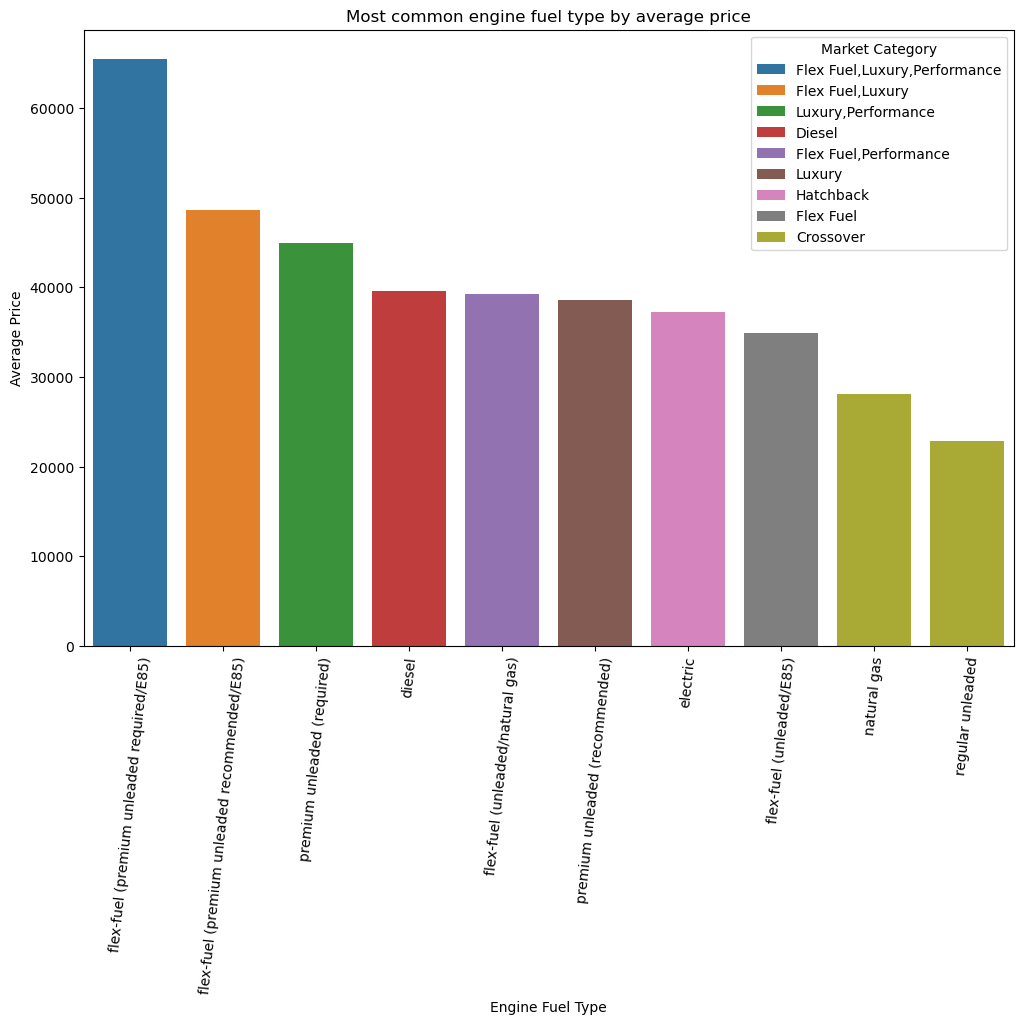

In [31]:
plt.figure(figsize = (12,8))
sns.barplot(data = piv1,x = 'Engine Fuel Type', y = 'Price', hue = 'Market Category')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=84)
plt.title('Most common engine fuel type by average price')
plt.show()

The analysis indicates that vehicles having engine fuel types flex-fuel (premium unleaded required/E85), flex-fuel (premium unleaded recommended/E85), premium unleaded (required), diesel, flex-fuel (unleaded/natural gas), premium unleaded (recommended) and electric have high mean price and belong to market categories flexible fuel, diesel, hatchback, performance and luxury. Vehicles with flex-fuel (unleaded/E85), natural gas, and regular unleaded engine fuel types have a medium to low average price and are associated with market segments of flexible fuel and crossover. This information will help in targeted marketing for different customer segments based on their preference and budget.

### Question 3: How does transmission type relate to vehicle pricing and listing frequency, and what does this reveal about buyer preferences across different budget segments?

Using this code, we can find the frequency of each transmission type and also the average prices per transmission type.

Using pd.crosstab(), I am creating a cross tabulation of the transmission type column from the dataframe df and then creating a column called count, where the frequency of each transmission type is stored

In [32]:
tt = pd.crosstab(df['Transmission Type'], columns = 'count')
tt = tt.reset_index()
tt

col_0,Transmission Type,count
0,AUTOMATED_MANUAL,416
1,AUTOMATIC,7696
2,DIRECT_DRIVE,55
3,MANUAL,2732


Using pd.crosstab(), I am passing the price column as values,I am using the aggfunc to find the average price for every transmission type. I am creating a column called Average Price where the mean of the price for every transmission type is stored. Then I am resetting the index and finally rounding off the average price to 2 decimal places.

In [33]:
tt_price = pd.crosstab(df['Transmission Type'], columns = 'Average Price',values = df['Price'], aggfunc = 'mean')
tt_price = tt_price.reset_index().round(2)
tt_price

col_0,Transmission Type,Average Price
0,AUTOMATED_MANUAL,34839.48
1,AUTOMATIC,32171.70
2,DIRECT_DRIVE,36947.00
3,MANUAL,17884.88


I am then merging the two dataframes using the common column called Transmission Type and storing it in a new dataframe. Then I am sorting the new dataframe by count and in descending order.

In [34]:
tt_final = tt_price.merge(tt, on = 'Transmission Type')
tt_final = tt_final.sort_values(by = 'count', ascending = False)
tt_final

col_0,Transmission Type,Average Price,count
1,AUTOMATIC,32171.70,7696
3,MANUAL,17884.88,2732
0,AUTOMATED_MANUAL,34839.48,416
2,DIRECT_DRIVE,36947.00,55


I am plotting a pie chart to visualise the listings of different transmission types. I am first setting the size of the pie chart using figsize. I am creating a list of myexplode to offset each slice for emphasis. Then, I am using plt.pie() to plot the pie chart, setting the x variable there as count, labels as the transmission type, autopct to show the percentage share of each transmission type in the pie chart, explode as the my myexplode list to offset each slice and I set the startangle to 120 to rotate the chart.

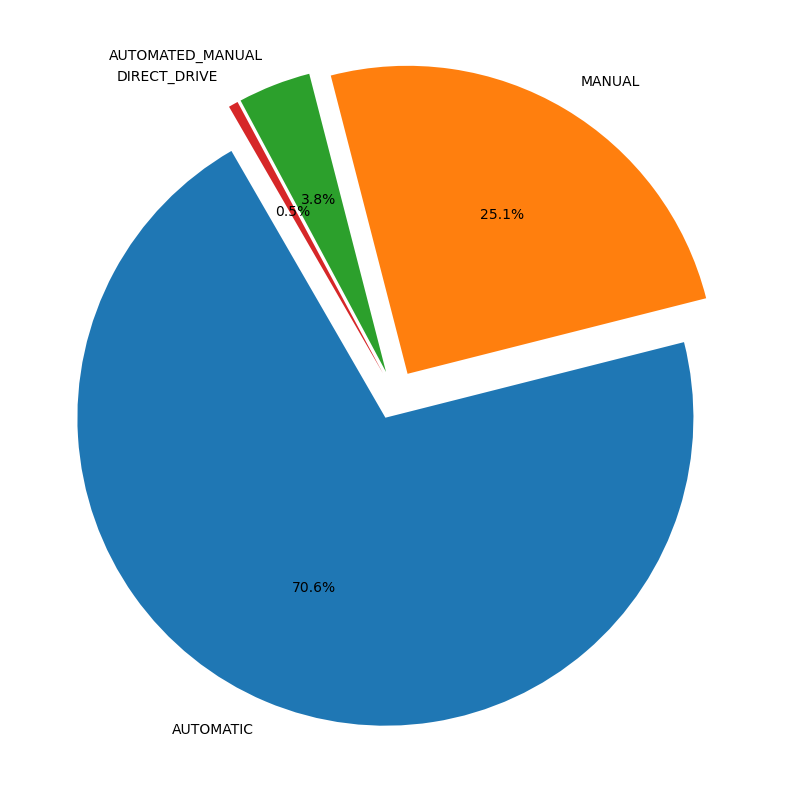

In [35]:
plt.figure(figsize = (10,10))
myexplode = [0.08,0.08,0.08,0.08]
plt.pie(tt_final['count'], labels = tt_final['Transmission Type'], autopct = '%1.1f%%', startangle = 120, explode = myexplode)
plt.show()

The analysis shows that cars with automatic transmission types have the most listings and have a mid range average price showing general buyer preference. Manual transmission types are less common but are the most affordable with the lowest price range. Cars with automated manual are the next most common in the listings, which also has a mid-range average price. the rarest are the cars with direct drive which have a high average price. This analysis will help in targeted marketing for different groups of buyers with different budgets and preferences.

### Question 4: How does horsepower relate to vehicle pricing, and which car makes have the highest average horsepower and which buyer segments can they be marketed to?

I am using the .corr() function to find the correlation between Engine HP and Price

In [36]:
df['Engine HP'].corr(df['Price'])

0.7321831616186965

I am plotting a scatter plot using sns.scatterplot(), to depict the relationship between engine horsepower and price

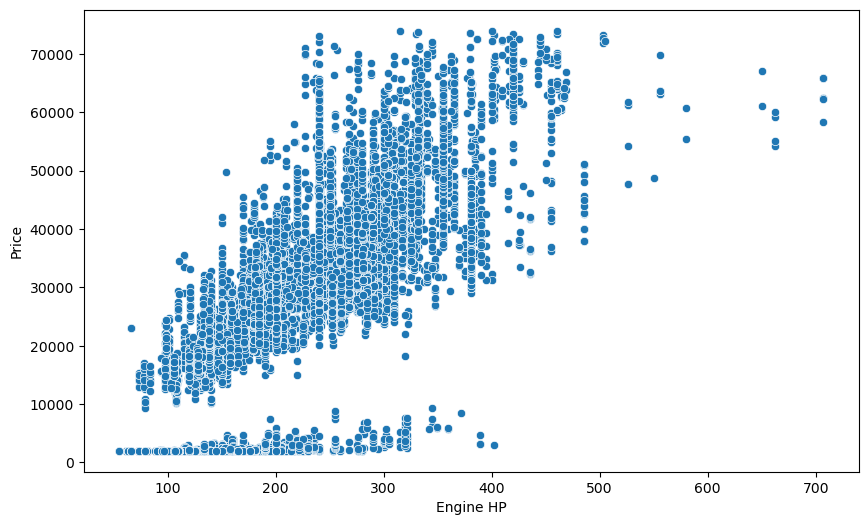

In [37]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'Engine HP', y = 'Price')
plt.xlabel('Engine HP')
plt.ylabel('Price')
plt.show()

I am grouping make of the car with the mean of the engine horsepower of the make of the car, and sorting the dataframe by engine horsepower and in descending order.

In [38]:
mehp = df.groupby('Make')['Engine HP'].mean().reset_index().sort_values(by = 'Engine HP', ascending = False)
mehp.head(10)

,Make,Engine HP
12,Genesis,347.333333
22,Maserati,345.000000
5,Cadillac,311.541935
16,Infiniti,309.793313
30,Porsche,290.250000
3,BMW,280.468619
20,Lincoln,279.637500
24,Mercedes-Benz,275.391129
19,Lexus,264.994536
13,HUMMER,261.235294


I am converting the contents of the Make column of the previous dataframe into a list using the .tolist() function, and using the list I am filtering the makes of cars with a high average horsepower using the .isin() function. I am grouping make of the car with the mean of the Price of the make of the car, and sorting the dataframe by Price and in descending order.

In [39]:
e = mehp['Make'].tolist()
mep = df[df['Make'].isin(e)]
mep = mep.groupby('Make')['Price'].mean().reset_index().sort_values(by = 'Price', ascending = False)
mep.head(10)

,Make,Price
22,Maserati,71000.000000
35,Tesla,69360.000000
1,Alfa Romeo,61600.000000
21,Lotus,60245.000000
5,Cadillac,48528.058065
3,BMW,46689.179916
12,Genesis,46616.666667
18,Land Rover,45797.712766
16,Infiniti,42253.009119
20,Lincoln,42024.481250


I am merging the two dataframes on the common column Make and then sorting the values on engine horsepower in descending order.

In [40]:
mehp_final = mehp.merge(mep, on = 'Make')
mehp_final = mehp_final.sort_values(by = 'Engine HP', ascending = False)
mehp_final.head(10)

,Make,Engine HP,Price
0,Genesis,347.333333,46616.666667
1,Maserati,345.000000,71000.000000
2,Cadillac,311.541935,48528.058065
3,Infiniti,309.793313,42253.009119
4,Porsche,290.250000,41708.650000
5,BMW,280.468619,46689.179916
6,Lincoln,279.637500,42024.481250
7,Mercedes-Benz,275.391129,37972.415323
8,Lexus,264.994536,41755.857923
9,HUMMER,261.235294,36464.411765


I am finding the the market category for each car make, and then merging all the columns together.

In [41]:
mc1 = df.groupby('Make')['Market Category'].apply(lambda x: x.mode()[0]).reset_index().sort_values(by = 'Market Category')
mehp_final1 = mehp_final.merge(mc1, on = 'Make')
mehp_final1.head(10)

,Make,Engine HP,Price,Market Category
0,Genesis,347.333333,46616.666667,"Luxury,Performance"
1,Maserati,345.000000,71000.000000,"Exotic,Luxury,High-Performance"
2,Cadillac,311.541935,48528.058065,"Luxury,Performance"
3,Infiniti,309.793313,42253.009119,"Luxury,Performance"
4,Porsche,290.250000,41708.650000,"Luxury,High-Performance"
5,BMW,280.468619,46689.179916,"Luxury,Performance"
6,Lincoln,279.637500,42024.481250,Luxury
7,Mercedes-Benz,275.391129,37972.415323,Luxury
8,Lexus,264.994536,41755.857923,"Luxury,Performance"
9,HUMMER,261.235294,36464.411765,Luxury


The high correlation between engine horsepower (Engine HP) and price shows that the greater the horsepower higher will be the price. The analysis shows that luxury car makes such as Genesis, Maserati, Cadillac, Infiniti, BMW, Lincoln, Mercedes-Benz, Lexus and Hummer have the highest average engine horsepower and also have premium pricing and belong to the luxury and performance market category. These insights suggest that high horsepower vehicles are in the premium segment and marketing campaigns are more likely to be effective when targeting buyers interested in luxury and performance.

### Question 5: What car makes are the most popular and how do they rank against each other?

Using these codes I am checking the most popular car makes, their ranking and their average price.

I am grouping the make of the car and mean of the popularity of the car make. Then I am using the .rank() function to rank the car makes based on popularity, and arranged it in descending order and used the dense method, so that if 2 car makes have the popularity they will be assigned the same rank.

In [42]:
avg_pop = df.groupby('Make')['Popularity'].mean().reset_index().sort_values(by = 'Popularity')
avg_pop.head(10)

,Make,Popularity
12,Genesis,21.0
27,Oldsmobile,26.0
20,Lincoln,61.0
32,Scion,105.0
1,Alfa Romeo,113.0
13,HUMMER,130.0
4,Buick,155.0
16,Infiniti,190.0
0,Acura,204.0
29,Pontiac,210.0


In [43]:
avg_pop['Ranking'] = avg_pop['Popularity'].rank(method = 'dense', ascending = False)
avg_pop.head()

,Make,Popularity,Ranking
12,Genesis,21.0,39.0
27,Oldsmobile,26.0,38.0
20,Lincoln,61.0,37.0
32,Scion,105.0,36.0
1,Alfa Romeo,113.0,35.0


I am using the .nlargest() function to find the top 10 car makes based on popularity and .nsmallest() to find the least popular car makes

In [44]:
avg_pop_largest = avg_pop.nlargest(10,'Popularity')
avg_pop_largest

,Make,Popularity,Ranking
10,Ford,5657.0,1.0
3,BMW,3916.0,2.0
2,Audi,3105.0,3.0
14,Honda,2202.0,4.0
36,Toyota,2031.0,5.0
26,Nissan,2009.0,6.0
8,Dodge,1851.0,7.0
17,Kia,1720.0,8.0
30,Porsche,1715.0,9.0
5,Cadillac,1624.0,10.0


In [45]:
avg_pop_smallest = avg_pop.nsmallest(10,'Popularity')
avg_pop_smallest

,Make,Popularity,Ranking
12,Genesis,21.0,39.0
27,Oldsmobile,26.0,38.0
20,Lincoln,61.0,37.0
32,Scion,105.0,36.0
1,Alfa Romeo,113.0,35.0
13,HUMMER,130.0,34.0
4,Buick,155.0,33.0
16,Infiniti,190.0,32.0
0,Acura,204.0,31.0
29,Pontiac,210.0,30.0


I am then creating a custom function called plotting() which takes 2 arguements, the name of the dataframe and the title of the graph and the color. I created this function to plot bar graphs for each make of the car based on their popularities and ranking.

In [46]:
def plotting(dataframe,title):
    plt.figure(figsize = (10,6))
    sns.barplot(data = dataframe,x = 'Make',y = 'Popularity',hue = 'Ranking')
    plt.xlabel('Make')
    plt.ylabel('Ranking')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

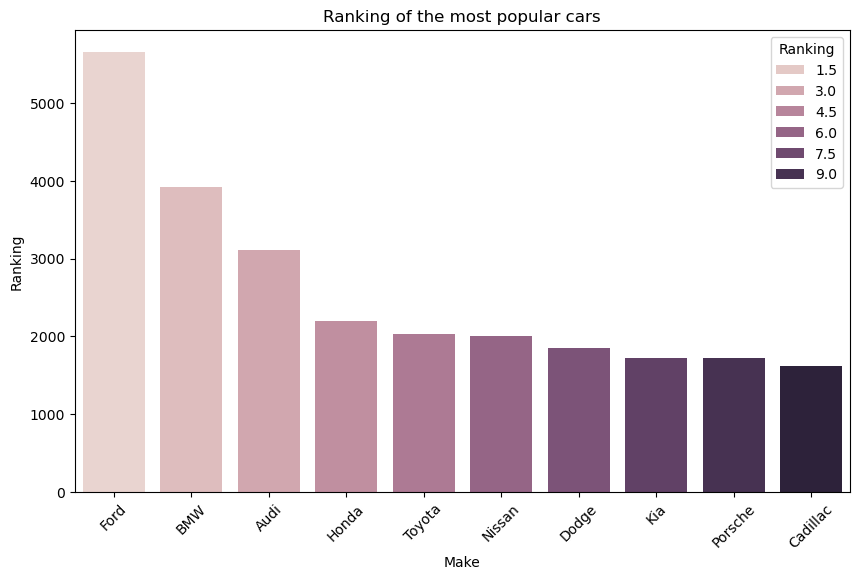

In [47]:
plotting(avg_pop_largest,'Ranking of the most popular cars')

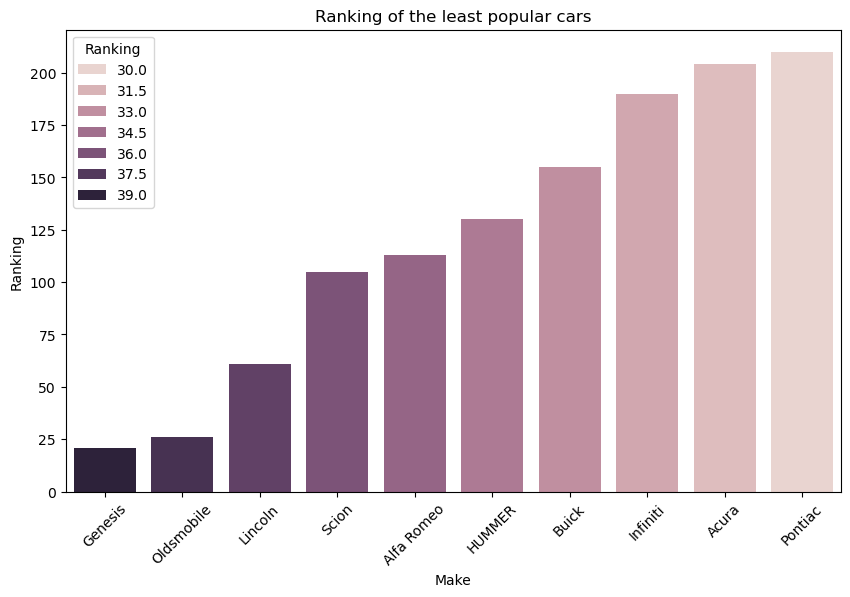

In [48]:
plotting(avg_pop_smallest,'Ranking of the least popular cars')

From the analysis it can be observed that the top 10 most popular car makes among customers are Ford, BMW, Audi, Honda, Toyota, Nissan, Dodge, Kia, Porsche and Cadillac.The 10 least popular car makes are Pontiac, Acura, Infiniti, Buick, Hummer, Alfa Romeo, Scion, Lincoln, Oldsmobile and Genesis.  This analysis helps to identify the most popular mainstream and luxury car makes and least popular and less favoured car makes among customers, which would help in targeted marketing of mainstream and niche segments effectively.

### Question 6: How the model year influence a vehicle's price?

This codes will help me to see the average prices of models from different years and the price range distribution of the models for those years.

I am grouping the model year with the average prices of the models of those years and sorting it in ascending order

In [49]:
avg_price_year = df.groupby(['Year'])['Price'].mean().reset_index().sort_values(by = 'Year', ascending = True)
avg_price_year

,Year,Price
0,1990,2020.203252
1,1991,2085.138889
2,1992,2077.740113
3,1993,2189.135266
4,1994,2312.030675
5,1995,2606.777778
6,1996,2497.366412
7,1997,3117.988439
8,1998,2975.597403
9,1999,3110.508475


I am plotting a line chart, using sns.lineplot(), where I have entered the data as the dataframe I created above and setting the x as Year and y as Price and marker as 'o' to highlight each average price datapoint with a circle for every year.

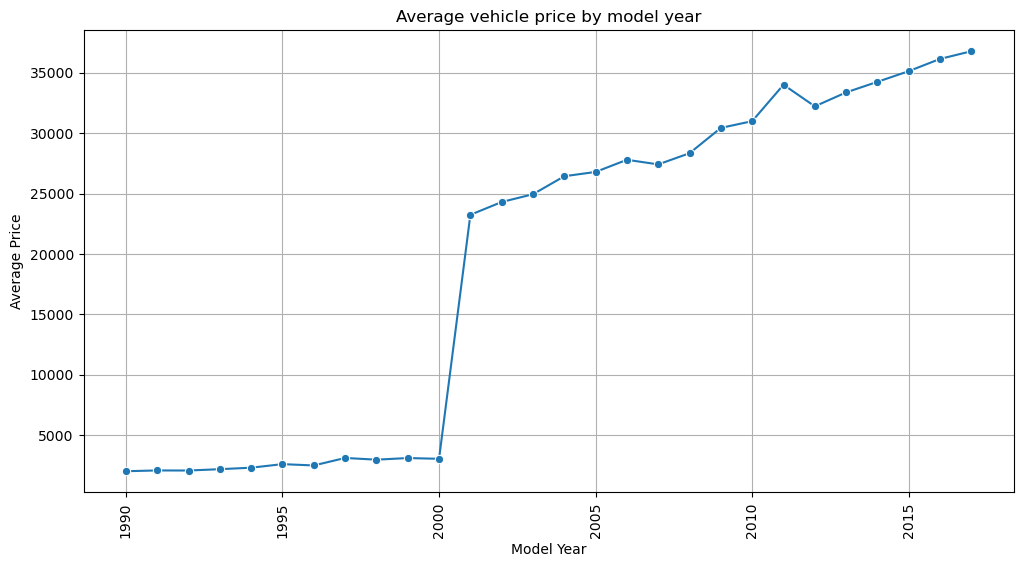

In [50]:
plt.figure(figsize = (12,6))
sns.lineplot(data = avg_price_year, x = 'Year', y = 'Price', marker = 'o')
plt.xlabel('Model Year')
plt.xticks(rotation = 90)
plt.ylabel('Average Price')
plt.title('Average vehicle price by model year')
plt.grid(True)
plt.show()

I am plotting a boxplot using sns.boxplot() to visualise the distribution of vehicle prices for each model year in the dataframe.

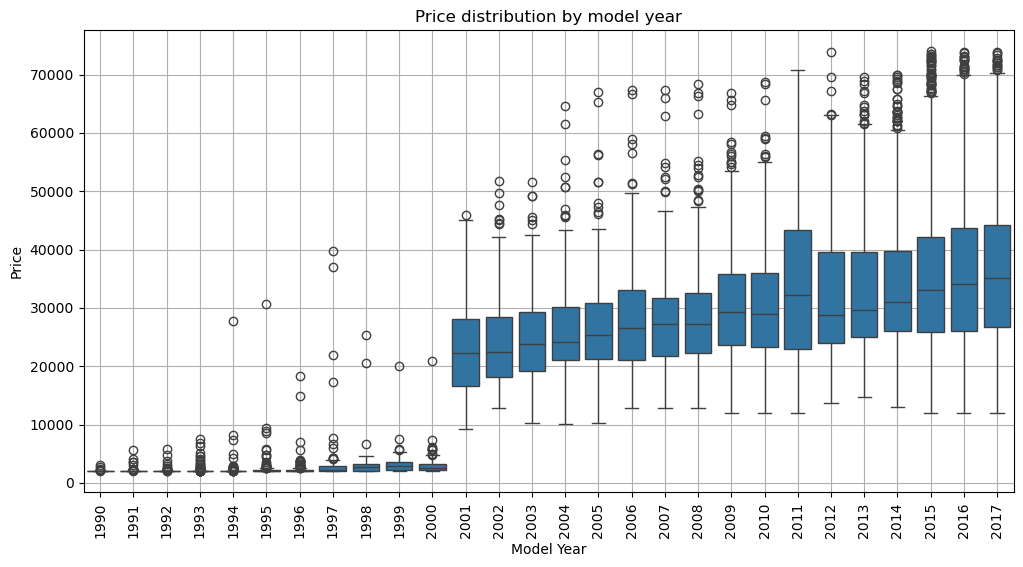

In [51]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'Year', y = 'Price')
plt.xlabel('Model Year')
plt.xticks(rotation = 90)
plt.ylabel('Price')
plt.title('Price distribution by model year')
plt.grid(True)
plt.show()

The dealership's inventory shows a clear relationship between model price and year. The older vehicles (1990-2000) have a low mean price of under \\$5000, and with very little variation. The vehicles of the year 2001 and later, the average goes above \\$20,000 and continues to grow consistently, going above $35,000 for vehicles over the year 2015. The newer vehicles, not only do they have higher averages, but also more spread-out prices, thus, they have low-cost and luxury options. Overall, the dealer can service low-cost buyers, middle-range buyers and luxury buyers by having low-cost, mid-range and luxury vehicles of different model years and prices.

### Question 7: Create a machine learning model pipeline to predict the prices of cars based on their characterstics

These codes will help me to create a machine learning model pipeline to predict prices of cars based on the independant variables.

I am creating a copy of the dataframe in a new dataframe df1

In [52]:
df1 = df

I am assigning the independent variables in the dataframe to X, and dropping the target variable called Price along with Model, as the name of the car model cannot be considered a car feature. I am assigning the target variable Price to y.

In [53]:
X = df1.drop(['Price','Model'], axis = 1)
y = df1['Price']

Using the train_test_split() function I divide the data for training and testing. X_train and y_train are for training the data and X_test and y_test are used as test data for the regression model. The test_size is set as 0.30, which splits the data into 70% training data and 30% testing data. random_state = 42, is used so that whenever we run the program, the split will keep the same data every time for X_train,X_test,y_train and y_test. 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

Here I am using Pipelines and ColumnTransformers to automate different pre-processing steps for different types of columns.

I am selecting the numerical and categorical data from the X, which does not include the model and price, then I am extracting the column names from the data and converting it into a list and storing the unique numerical column names in num_col and unqiue categorical names in cat_col.

In [55]:
numerical_variables = X.select_dtypes(include = 'number')
categorical_variables = X.select_dtypes(include = ['category','object'])

In [56]:
num_col = numerical_variables.columns.tolist()
cat_col = categorical_variables.columns.tolist()

In Pipeline(), each pipeline is specified in tuples which consists of 2 elements. The first position is for the name I want to give and the second position is for the function I am going to apply. The pipeline ensure each process takes place one after the other.

For num_pipe I am combining filling missing values and standardization.Inside the Pipeline I am using SimpleImputer() function to fill in the missing values. Median will be used to fill the numerical missing values by using the strategy = 'median' and I am also using StandardScaler(), which is needed to standardise all the numerical variables to a mean of 0 and standard deviation of 1. This is crucial for performing linear regression.

In [57]:
num_pipe = Pipeline([
    ('numerical_missing_values',SimpleImputer(strategy ='median')),
    ('scaling_numerical_variables',StandardScaler())
])

For cat_pipe I am combining filling missing values and one hot encoding. In the same way, I am using SimpleImpuer(), where I have used the strategy called most_frequent to fill in the categorical missing values with the most frequent variable in each categorical column.I am also using OneHotEncoder() to convert the categorical variables into dummy variables, thus allowing us to use the numerical versions of the categorical data, which will help us to do linear regression. I am using drop = 'first', to drop the first column in each categorical column on which OneHotEncoder has been applied to prevent multicollinearity, handle_unknown = 'ignore' is being used to ignore any categorical variables in the test set, which are not available in the training set. sparse_output = False, means that it gives a dense NumPy array where all the 0s and 1s are stored.

In [58]:
cat_pipe = Pipeline([
    ('categorical_missing_values',SimpleImputer(strategy = 'most_frequent')),
    ('one_hot_encoding', OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False))
])

In ColumnTransformer(), each tranformation is specified in tuples which consists of 3 elements. The first position is for the name I want to give, second position is for the function i am going to apply, and the third for the column names or index positions of the columns in the dataframe. for the preprocessor column transfomer, the first transfomer being used is the Numerical Columns Preprocessing, where I enter the name of the pipeline (num_pipe) and the columns it is going to perform preprocessing on is num_col. In the same way for the Categorical Columns Preprocessing, the cat_pipe pipeline performs the preprocessing on the cat_col. The remainder = 'passthrough' ensures that the columns not specified pass through without any transformation.

In [59]:
preprocessor = ColumnTransformer([
    ('Numerical Columns Preprocessing',num_pipe,num_col),
    ('Categorical Columns Preprocessing',cat_pipe,cat_col)
], remainder = 'passthrough')

In the final pipeline called pipe, I am combining the preprocessing and linear regression into a single pipeline. The preprocessor takes care of the preprocessing. I am then using LinearRegression() to define a linear regression model which will be used on the preprocessed data. I am using linear regression here, because the target variable is a continous variable and so I can use linear regression to predict the prices based on independant variables.

In [60]:
pipe = Pipeline([
    ('Preprocessing',preprocessor),
    ('Linear Regression', LinearRegression())
])

I am using .fit() function to train the linear regression model on the X_train and y_train. After running the code, it gives a visual depiction of the pipeline, showing which steps are taking place after the other.

In [61]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns '
                                                  'Preprocessing',
                                                  Pipeline(steps=[('numerical_missing_values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling_numerical_variables',
                                                                   StandardScaler())]),
                                                  ['Year', 'Engine HP',
                                                   'Engine Cylinders',
                                                   'Number of Doors',
                                                   'highway MPG', 'city mpg',
                                                   'Popularity']),
                                                 ('Cate...
                                                  'Preprocessing',
                                                  Pipeline(steps=[('categorical_missing_values',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Market Category',
                                                   'Vehicle Size',
                                                   'Vehicle Style'])])),
                ('Linear Regression', LinearRegression())])

I am using the trained  model with the .predict() function on the X_test which contains the independent variables to predict the target variable called price.

In [62]:
y_pred = pipe.predict(X_test)
y_pred

array([26334.90625, 46359.96875, 49300.90625, ..., 38358.78125,
       34827.71875,  3969.78125])

The R2 score is used to check how close the predicted values of price (y_pred) is to the actual values of price (y_test), and closer the value is to 1, better is the fit of the model. I have used the function r2_score(y_test,y_pred) to compare both the values and achieved a score of 0.8624 or 86.24% which shows that my model performs very well. I also used the function mean_absolute_error() and mean_squared_error(), which shows the differences between the predicted value and the actual value.

In [63]:
print(f'The r2 score is: {r2_score(y_test,y_pred)*100}% \nThe mean absolute error is: {mean_absolute_error(y_test,y_pred)} \nThe mean squared error is: {mean_squared_error(y_test,y_pred)}')

The r2 score is: 86.24031631225748% 
The mean absolute error is: 4520.782339449542 
The mean squared error is: 35054506.69076238


A pipeline has been built with a very high r2 score of 86.2%, which shows this model can very accurately predict prices of cars based on their characterstics. The model can be applied to future vehicle listings, allowing the dealership to estimate the prices for new vehicles as they arrive.The pipeline automates preprocessing and model building, ensuring consistent, efficient and data driven pricing decisions over time.

##### Business Questions and answers:

1) Which car makes represent the premium section of the market and what does this reveal about their market positioning?

Ans: The analysis shows that car makes like Masarati, Tesla, Alfa Romeo, Lotus, Cadillac, BMW, Genesis, Land Rover, Infiniti and Lincoln represent the premium section of the listings. All these car makes have a higher average price than the other car makes. So these car makes represents the premium section of the market and falls into market categories such as exotic, high performace, luxury, performance and crossover. This can help with inventory management, targeted marketing and pricing strategies especially targeted towards premium vehicle buyers.

2) How does engine fuel type influence the average price of vehicles and what insights can it provide for pricing strategy and marketing?

Ans: The analysis indicates that vehicles having engine fuel types flex-fuel (premium unleaded required/E85), flex-fuel (premium unleaded recommended/E85), premium unleaded (required), diesel, flex-fuel (unleaded/natural gas), premium unleaded (recommended) and electric have high mean price and belong to market categories flexible fuel, diesel, hatchback, performance and luxury. Vehicles with flex-fuel (unleaded/E85), natural gas, and regular unleaded engine fuel types have a medium to low average price and are associated with market segments of flexible fuel and crossover. This information will help in targeted marketing for different customer segments based on their preference and budget.

3) How does transmission type relate to vehicle pricing and listing frequency, and what does this reveal about buyer preferences across different budget segments?

Ans: The analysis shows that cars with automatic transmission types have the most listings and have a mid range average price showing general buyer preference. Manual transmission types are less common but are the most affordable with the lowest price range. Cars with automated manual are the next most common in the listings, which also has a mid-range average price. the rarest are the cars with direct drive which have a high average price. This analysis will help in targeted marketing for different groups of buyers with different budgets and preferences.

4) How does horsepower relate to vehicle pricing, and which car makes have the highest average horsepower and which buyer segments can they be marketed to?

Ans: The high correlation between engine horsepower (Engine HP) and price shows that the greater the horsepower higher will be the price. The analysis shows that luxury car makes such as Genesis, Maserati, Cadillac, Infiniti, BMW, Lincoln, Mercedes-Benz, Lexus and Hummer have the highest average engine horsepower and also have premium pricing and belong to the luxury and performance market category. These insights suggest that high horsepower vehicles are in the premium segment and marketing campaigns are more likely to be effective when targeting buyers interested in luxury and performance.

5) What car makes are the most popular and how do they rank against each other?

Ans: From the analysis it can be observed that the top 10 most popular car makes among customers are Ford, BMW, Audi, Honda, Toyota, Nissan, Dodge, Kia, Porsche and Cadillac.The 10 least popular car makes are Pontiac, Acura, Infiniti, Buick, Hummer, Alfa Romeo, Scion, Lincoln, Oldsmobile and Genesis. This analysis helps to identify the most popular mainstream and luxury car makes and least popular and less favoured car makes among customers, which would help in targeted marketing of mainstream and niche segments effectively.

6) How does the model year influence a vehicles price?

Ans: The dealership's inventory shows a clear relationship between model price and year. The older vehicles (1990-2000) have a low mean price of under \\$5000, and with very little variation. The vehicles of the year 2001 and later, the average goes above \\$20,000 and continues to grow consistently, going above $35,000 for vehicles over the year 2015. The newer vehicles, not only do they have higher averages, but also more spread-out prices, thus, they have low-cost and luxury options. Overall, the dealer can service low-cost buyers, middle-range buyers and luxury buyers by having low-cost, mid-range and luxury vehicles of different model years and prices.

7) Create a machine learning model pipeline to predict the prices of cars based on their characterstics

Ans: A pipeline has been built with a very high r2 score of 86.2%, which shows this model can very accurately predict prices of cars based on their characterstics. The model can be applied to future vehicle listings, allowing the dealership to estimate the prices for new vehicles as they arrive.The pipeline automates preprocessing and model building, ensuring consistent, efficient and data driven pricing decisions over time. 

# 5. Discussion

##### Overall Strengths:

1) It gives a clear overview of the dealership's inventory and relates vehicle characterstics such as horsepower,transmission, fuel type , model year and make to pricing and customer preferences.
2) It reveals market segregation and distinguishes between premium, mid range and budget vehicles.
3) It highlights trends in popular makes and market segments which can be directly utilized for inventory management and marketing strategies.
4) The machine learning model will be able to predict the price of a vehicle based on their characteristics.

##### Overall limitations:

1) The data is limited to the dealership's current inventory, so results may not be representative of overall market trends or competitor offerings.
2) The popularity of certain car makes may change over time, which is not taken into account in the EDA.

##### Business Implications and Recommendations:

1) Premium makes appeals to buyers who seek luxury, high performance and exotic vehicles. These vehicles should be marketed towards buyers who are interested in premium and high performance cars.
2) Vehicle characterstics like fuel type, transmission type, horsepower and model year significantly affects pricing and appeal to different market segments. Using these characterstics, targeted marketing can be used to match customer's preferences and budgets.
3) The inventory of available cars vary across a wide range of model years, with varying prices.Vehicle models before 2001 fall into the very low price segment best for buyers with a very limited budget and vehicles after 2001 are distributed across budget,mid range and premium buyers, giving flexibility to meet the needs of different buyers.
4) Popularity analysis of the cars reveals the makes of cars which are most and least liked by the customers. The dealership can focus on promotional efforts and marketing of the most favored car makes to buyers across all price segments and the least favored car makes can be promoted to niche segments.
5) The dealership can use the machine learning pipeline to predict the price of new listings based on the characterstics of the vehicle. 

# 6. Links

https://www.kaggle.com/datasets/CooperUnion/cardataset

https://github.com/anuronmitra2001/AI-and-Applications-M504D-Project_Anuron-Mitra

https://drive.google.com/file/d/1xTOU8G_eFoD1BScOqprlwxTgY6PXixGU/view?usp=sharing